In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
plt.rcParams.update({
    'font.size': 6,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{amsmath}\usepackage{array}',
    "font.family": "Times New Roman"
})

# **Basis Non Rectangular dan Rectangular**

## 2D

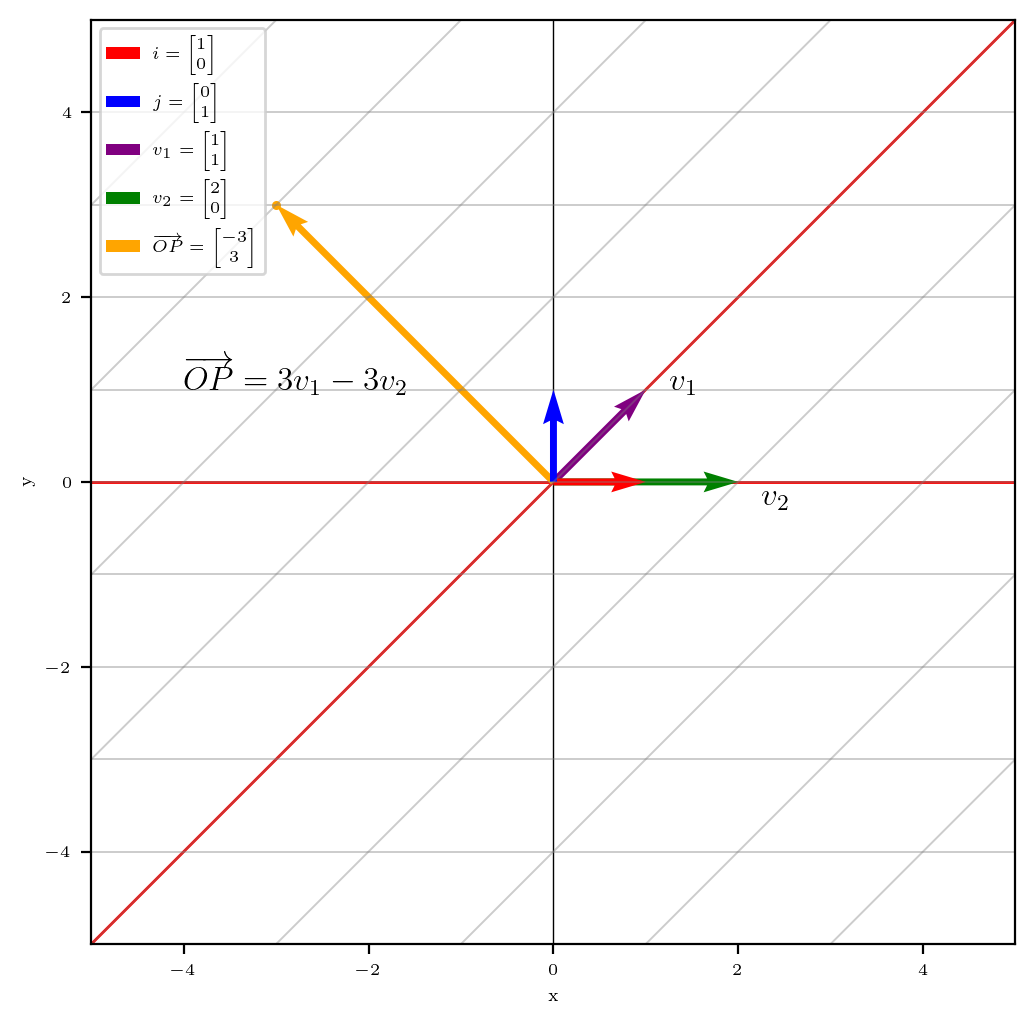

In [2]:
fig, ax = plt.subplots(figsize=(6,6), dpi=200) 

# Standard axes
anchor = 5
ax.plot([-anchor, anchor], [0, 0], color="black", linewidth=0.5, zorder=0)  # x-axis
ax.plot([0, 0], [-anchor, anchor], color="black", linewidth=0.5, zorder=0)  # y-axis

# --- Standard Basis ---
i = np.array([1, 0])
j = np.array([0, 1])
ax.quiver(0, 0, *i, color="r", angles="xy", scale_units="xy", scale=1,
          label=rf'$i=\begin{{bmatrix}} {i[0]} \\ {i[1]} \end{{bmatrix}}$', zorder=2)
ax.quiver(0, 0, *j, color="b", angles="xy", scale_units="xy", scale=1,
          label=rf'$j=\begin{{bmatrix}} {j[0]} \\ {j[1]} \end{{bmatrix}}$', zorder=2)

# --- New Basis ---
v1 = np.array([1, 1])
v2 = np.array([2, 0])

# New axes lines
ax.plot([-anchor * v1[0], anchor * v1[0]],
        [-anchor * v1[1], anchor * v1[1]],
        color="r", linestyle="solid", linewidth=1, zorder=1)
ax.plot([-anchor * v2[0], anchor * v2[0]],
        [-anchor * v2[1], anchor * v2[1]],
        color="r", linestyle="solid", linewidth=1, zorder=1)

# Basis arrows
ax.quiver(0, 0, *v1, color="purple", angles="xy", scale_units="xy", scale=1,
          label=rf'$v_1=\begin{{bmatrix}} {v1[0]} \\ {v1[1]} \end{{bmatrix}}$')
ax.text(v1[0]+0.25, v1[1], s=rf'''$v_1$''', fontsize=12)

ax.quiver(0, 0, *v2, color="green", angles="xy", scale_units="xy", scale=1,
          label=rf'$v_2=\begin{{bmatrix}} {v2[0]} \\ {v2[1]} \end{{bmatrix}}$')
ax.text(v2[0]+0.25, v2[1]-0.25, s=rf'''$v_2$''', fontsize=12)

# --- Skewed Grid with smaller spacing ---
N = 10          # range of shifts
step = 1.      # smaller step size
vals = np.arange(-N, N+step, step)

for m in vals:
    # lines parallel to v1
    start = m * v2 - N * v1
    end   = m * v2 + N * v1
    ax.plot([start[0], end[0]], [start[1], end[1]], color="gray", linewidth=0.7, alpha=0.4)

for n in vals:
    # lines parallel to v2
    start = n * v1 - N * v2
    end   = n * v1 + N * v2
    ax.plot([start[0], end[0]], [start[1], end[1]], color="gray", linewidth=0.7, alpha=0.4)

k1 = 3
k2 = -3
v3 = k1*v1 + k2*v2
ax.quiver(0, 0, *v3, color="orange", angles="xy", scale_units="xy", scale=1,
          label=rf'$\overrightarrow{{OP}}=\begin{{bmatrix}} {v3[0]} \\ {v3[1]} \end{{bmatrix}}$')

if k2 < 0:
    ax.text(v3[0]/2-2.5, v3[1]/2-0.5, s=rf'''$\overrightarrow{{OP}} = {k1}v_1 {k2}v_2$''', fontsize=12)
else:
    ax.text(v3[0]/2-2.5, v3[1]/2-0.5, s=rf'''$\overrightarrow{{OP}} = {k1}v_1 +   {k2}v_2$''', fontsize=12)

ax.scatter(*v3, s=5, color='orange')

# Labels
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')
ax.grid(False)
ax.legend()

plt.show()


## 3D

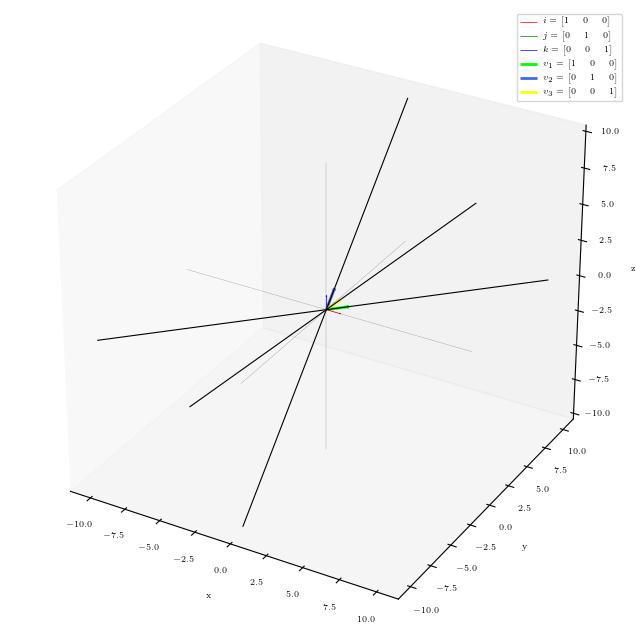

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Unit Vector
anchor = 10
ax.plot([-anchor, anchor], [0, 0], [0, 0]  , color="black", linestyle="solid", linewidth=0.1, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0]  , color="black", linestyle="solid", linewidth=0.1, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor]          , color="black", linestyle="solid", linewidth=0.1, zorder=10)       # Z-axis

i = np.array([1, 0, 0])
j = np.array([0, 1, 0])
k = np.array([0, 0, 1])
ax.quiver(0, 0, 0, *i, color="r", arrow_length_ratio=0.1, linewidth=0.5, label=rf'$i=\begin{{bmatrix}} {i[0]} & {i[1]} & {i[2]} \end{{bmatrix}}$')
ax.quiver(0, 0, 0, *j, color="g", arrow_length_ratio=0.1, linewidth=0.5, label=rf'$j=\begin{{bmatrix}} {j[0]} & {j[1]} & {j[2]} \end{{bmatrix}}$')
ax.quiver(0, 0, 0, *k, color="b", arrow_length_ratio=0.1, linewidth=0.5, label=rf'$k=\begin{{bmatrix}} {k[0]} & {k[1]} & {k[2]} \end{{bmatrix}}$')

# New Basis 
v1 = np.array([1, 1, 0])
v2 = np.array([0, 1, 1])
v3 = np.array([1, 0, 1])
anchor = 10
ax.plot(
    [-anchor * v1[0], anchor*v1[0]], 
    [-anchor * v1[1], anchor*v1[1]],
    [-anchor * v1[2], anchor*v1[2]], 
    color="black", linestyle="solid", linewidth=0.8, zorder=10)  
ax.plot(
    [-anchor * v2[0], anchor*v2[0]], 
    [-anchor * v2[1], anchor*v2[1]],
    [-anchor * v2[2], anchor*v2[2]], 
    color="black", linestyle="solid", linewidth=0.8, zorder=10)  
ax.plot(
    [-anchor * v3[0], anchor*v3[0]], 
    [-anchor * v3[1], anchor*v3[1]],
    [-anchor * v3[2], anchor*v3[2]], 
    color="black", linestyle="solid", linewidth=0.8, zorder=10)  

ax.quiver(0, 0, 0, *v1, color="lime", arrow_length_ratio=0.1, linewidth=2, label=rf'$v_1=\begin{{bmatrix}} {i[0]} & {i[1]} & {i[2]} \end{{bmatrix}}$')
ax.quiver(0, 0, 0, *v2, color="royalblue", arrow_length_ratio=0.1, linewidth=2, label=rf'$v_2=\begin{{bmatrix}} {j[0]} & {j[1]} & {j[2]} \end{{bmatrix}}$')
ax.quiver(0, 0, 0, *v3, color="yellow", arrow_length_ratio=0.1, linewidth=2, label=rf'$v_3=\begin{{bmatrix}} {k[0]} & {k[1]} & {k[2]} \end{{bmatrix}}$')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_aspect('equal')
ax.grid(False)
ax.legend()

plt.show()

# **Koordinat Relatif**

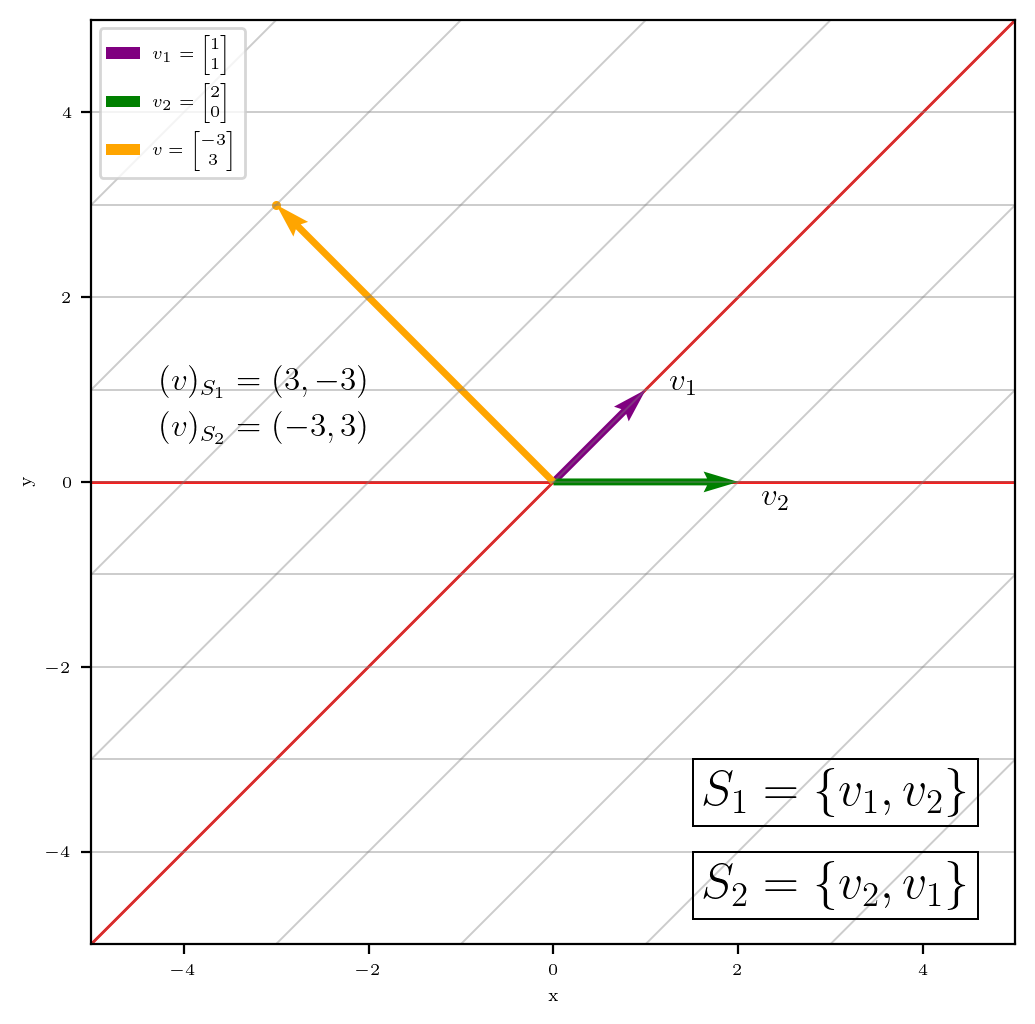

In [4]:
fig, ax = plt.subplots(figsize=(6,6), dpi=200) 

# Standard axes


# --- New Basis ---
v1 = np.array([1, 1])
v2 = np.array([2, 0])

# New axes lines
ax.plot([-anchor * v1[0], anchor * v1[0]],
        [-anchor * v1[1], anchor * v1[1]],
        color="r", linestyle="solid", linewidth=1, zorder=1)
ax.plot([-anchor * v2[0], anchor * v2[0]],
        [-anchor * v2[1], anchor * v2[1]],
        color="r", linestyle="solid", linewidth=1, zorder=1)

# Basis arrows
ax.quiver(0, 0, *v1, color="purple", angles="xy", scale_units="xy", scale=1,
          label=rf'$v_1=\begin{{bmatrix}} {v1[0]} \\ {v1[1]} \end{{bmatrix}}$')
ax.text(v1[0]+0.25, v1[1], s=rf'''$v_1$''', fontsize=12)

ax.quiver(0, 0, *v2, color="green", angles="xy", scale_units="xy", scale=1,
          label=rf'$v_2=\begin{{bmatrix}} {v2[0]} \\ {v2[1]} \end{{bmatrix}}$')
ax.text(v2[0]+0.25, v2[1]-0.25, s=rf'''$v_2$''', fontsize=12)

# --- Skewed Grid with smaller spacing ---
N = 10          # range of shifts
step = 1.      # smaller step size
vals = np.arange(-N, N+step, step)

for m in vals:
    # lines parallel to v1
    start = m * v2 - N * v1
    end   = m * v2 + N * v1
    ax.plot([start[0], end[0]], [start[1], end[1]], color="gray", linewidth=0.7, alpha=0.4)

for n in vals:
    # lines parallel to v2
    start = n * v1 - N * v2
    end   = n * v1 + N * v2
    ax.plot([start[0], end[0]], [start[1], end[1]], color="gray", linewidth=0.7, alpha=0.4)

k1 = 3
k2 = -3
v3 = k1*v1 + k2*v2
ax.quiver(0, 0, *v3, color="orange", angles="xy", scale_units="xy", scale=1,
          label=rf'$v=\begin{{bmatrix}} {v3[0]} \\ {v3[1]} \end{{bmatrix}}$')


ax.text(v3[0]/2-2.75, v3[1]/2-0.5, s=rf'''$(v)_{{S_1}} = ({k1},{k2})$''', fontsize=12)
ax.text(v3[0]/2-2.75, v3[1]/2-1, s=rf'''$(v)_{{S_2}} = ({k2},{k1})$''', fontsize=12)

ax.scatter(*v3, s=5, color='orange')

# Labels
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

ax.text(1.5, -3.5, s=r'''$\boxed{S_1 = \{v_1, v_2\}}$''', fontsize=18)
ax.text(1.5, -4.5, s=r'''$\boxed{S_2 = \{v_2, v_1\}}$''', fontsize=18)

ax.set_aspect('equal')
ax.grid(False)
ax.legend()

plt.show()


# **Solution Space**

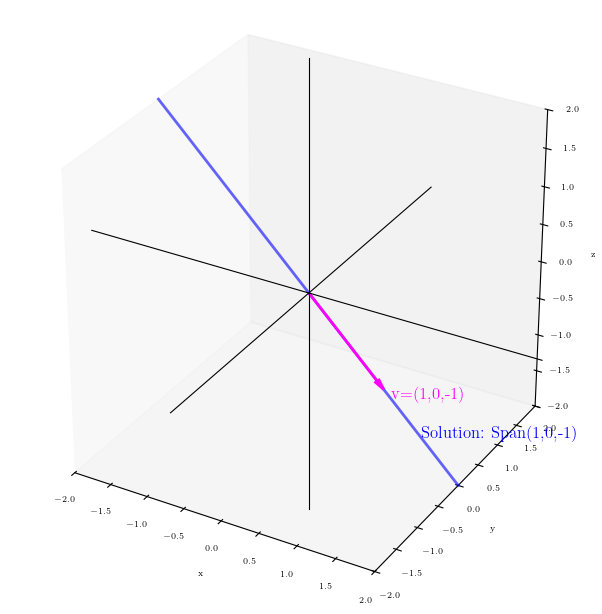

In [5]:
FONTSIZE = 12

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

anchor = 3
ax.plot([-anchor, anchor], [0, 0], [0, 0], color="black", linestyle="solid", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0], color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor], color="black", linestyle="solid", linewidth=0.8, zorder=10)  # Z-axis

# --- Define solution vector ---
v = np.array([1, 0, -1])

# --- Create points along the line ---
t = np.linspace(-2, 2, 10)
X = t*v[0]
Y = t*v[1]
Z = t*v[2]

ax.plot(X, Y, Z, color="blue", linewidth=2, alpha=0.6, label="Solution line")

# --- Plot vector ---
ax.quiver(0, 0, 0, *v, color="magenta", arrow_length_ratio=0.1, linewidth=2)
ax.text(*(v*1.1), "v=(1,0,-1)", color="magenta", fontsize=FONTSIZE)

# --- Label for the line ---
ax.text(1.5, 0, -1.5, "Solution: Span{(1,0,-1)}", color="blue", fontsize=FONTSIZE)

# Axes labels
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Set limits
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])

ax.set_box_aspect([1,1,1])
ax.grid(False)
plt.tight_layout()
plt.show()

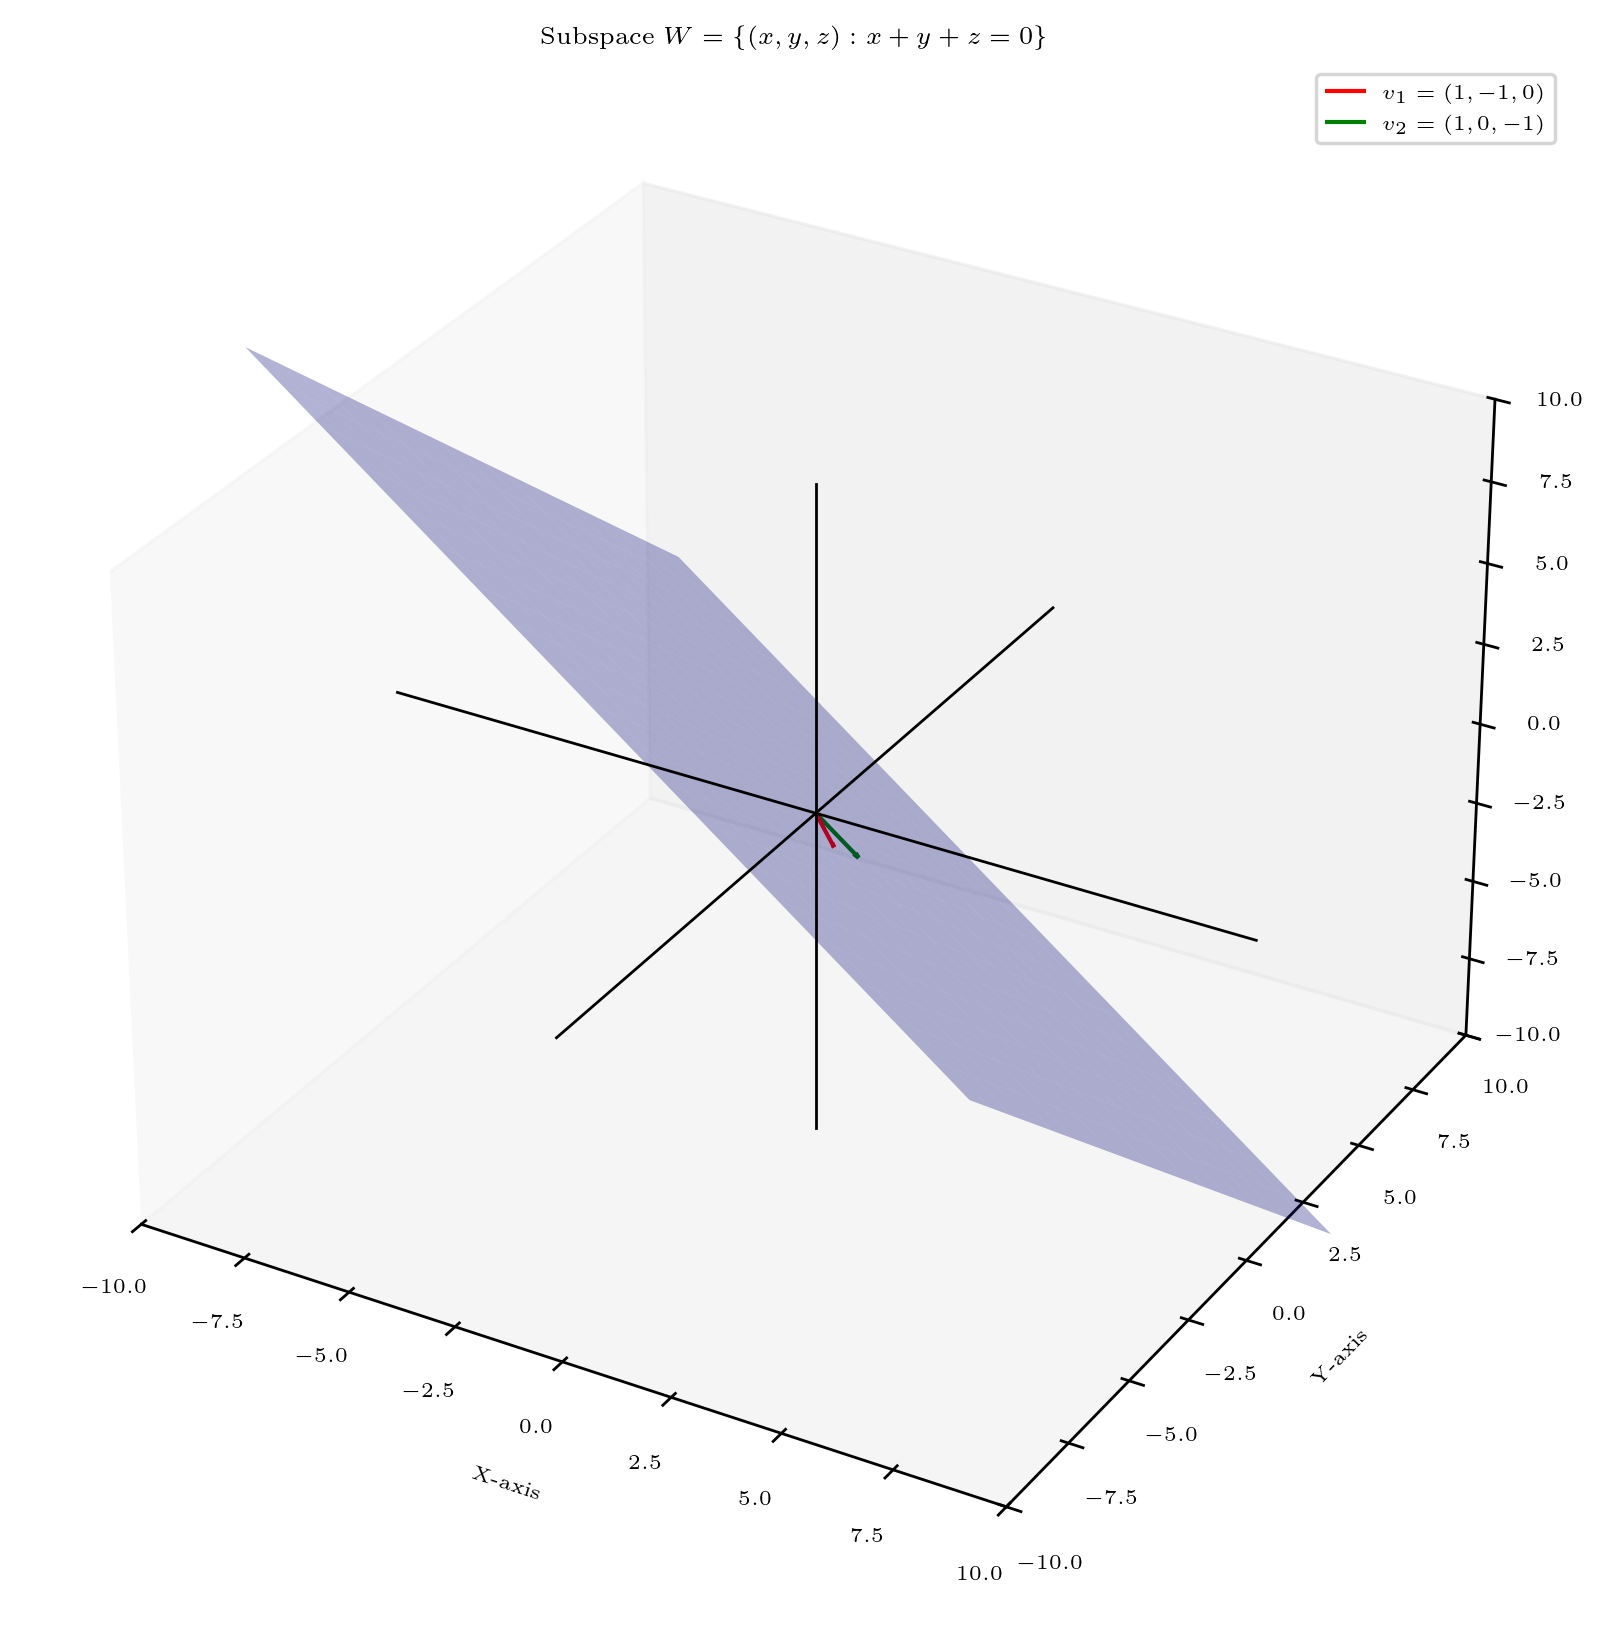

In [6]:
fig = plt.figure(figsize=(8, 8), dpi=250)
ax = fig.add_subplot(111, projection='3d')

anchor = 10
ax.plot([-anchor, anchor], [0, 0], [0, 0], color="black", linewidth=0.8, zorder=10)  # X-axis
ax.plot([0, 0], [-anchor, anchor], [0, 0], color="black", linewidth=0.8, zorder=10)  # Y-axis
ax.plot([0, 0], [0, 0], [-anchor, anchor], color="black", linewidth=0.8, zorder=10)  # Z-axis

# --- Define the plane x+y+z=0 ---
xx = np.linspace(-8, 8, 20)
yy = np.linspace(-8, 8, 20)
XX, YY = np.meshgrid(xx, yy)
ZZ = -(XX + YY)   # from equation x+y+z=0

ax.plot_surface(XX, YY, ZZ, alpha=0.3, color="blue", zorder=1)

# --- Example spanning vectors for W ---
v1 = np.array([1, -1, 0])
v2 = np.array([1, 0, -1])
ax.quiver(0, 0, 0, *v1, color="red", linewidth=1.2, arrow_length_ratio=0.1, label=r'$v_1=(1,-1,0)$')
ax.quiver(0, 0, 0, *v2, color="green", linewidth=1.2, arrow_length_ratio=0.1, label=r'$v_2=(1,0,-1)$')

# --- Formatting ---
ax.set_xlim([-anchor, anchor])
ax.set_ylim([-anchor, anchor])
ax.set_zlim([-anchor, anchor])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.set_aspect('auto')
ax.grid(False)
ax.legend()
plt.title(r"Subspace $W=\{(x,y,z):x+y+z=0\}$")
plt.show()


In [7]:
A = np.array(
    [[1,2,3],
    [2,9,3],
    [1,0,4]]
)
b = np.array([5,-1,9])
A_inv = np.linalg.inv(A)
A_inv @ b

array([ 1., -1.,  2.])

In [11]:
A = 1/3 * np.array([[2  , 1 ],
[-1 , 1]])
b = np.array([5,7])
A_inv = np.linalg.inv(A)
A_inv

array([[ 1., -1.],
       [ 1.,  2.]])

In [12]:
A @ b

array([5.66666667, 0.66666667])

In [26]:
A = 0.5 * np.array([
    [1,1,-1,-1],
    [1,-1, 1, 1],
    [-1,1, 1,-1],
    [-1,-1, 1, 3],
])
A_inv = np.linalg.inv(A)
b = np.array([1,2,3,4])

c = A_inv@b
c

array([3., 9., 5., 5.])

In [21]:
A @ b

array([-2.,  3.,  0.,  6.])

In [27]:
E_1 = np.array(
    [[1,1],
    [0,0]]
)
E_2 = np.array(
    [[1,0],
    [1,0]]
)
E_3 = np.array(
    [[0,1],
    [0,1]],
)
E_4 = np.array(
    [[0,0],
    [1,1]],
)

c[0] * E_1 + c[1] * E_2 + c[2] * E_3 + c[3] * E_4

array([[12.,  8.],
       [14., 10.]])